# 한글 워드 클라우드 - 여친선물

#### KoNLPy 설치
- 'konlpy 오류시 참고'로 검색
- Jpype 설치
- JPype1-1.1.2-cp38-cp38-win_amd64
- pip install JPype1-1.1.2-cp38-cp38-win_amd64.whl

In [30]:
import konlpy
konlpy.__version__

'0.5.2'

In [31]:
# Open Korean Text
from konlpy.tag import Okt
okt = Okt()
okt.nouns('해당 에러가 발생하는 것을 알 수 있다')

['해당', '에러', '발생', '것', '알', '수']

### 여친선물 - 워드 클라우드 만들기

In [32]:
with open('data/gift.txt', encoding='utf8') as file:
    gift_text = file.read()

In [33]:
tokens = okt.nouns(gift_text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [34]:
# 한글이외의 글자는 제거
import re
new_tokens = []
for token in tokens:
    new_token = re.sub('[^가-힣 ]', '', token)
    if new_token:                               #''는 포함시키지 X
        new_tokens.append(new_token)

In [35]:
# 한글폰트 사용

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

- 엉터리 단어 제거 - 수동으로 반복 처리

In [36]:
import nltk 

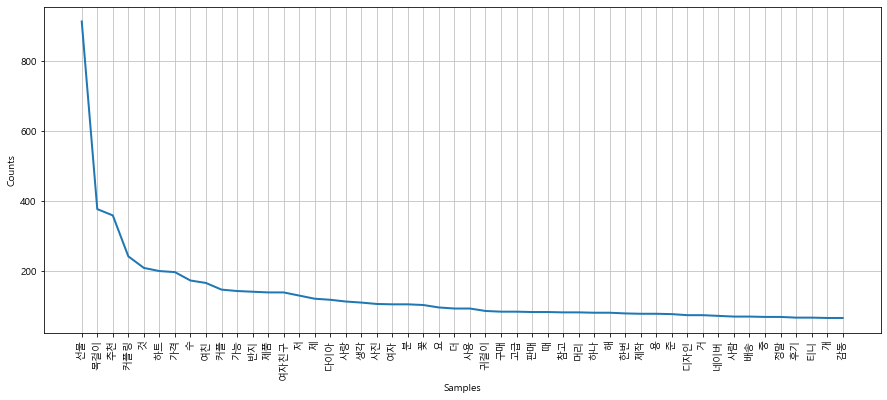

In [37]:

gf_gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [41]:
# stop_list = ['선물', '추천']
stop_words = '요 더 사용 구매 고급 때 참고 머리 하나 한번 제작 준 선물 추천 것 가격 수 여친 커플 가능 제품 여자친구 체 제 사랑 생각 여자 분'
stop_list = stop_words.split()

# new_token_list = []
# for token in new_tokens:
#    if token not in stop_list:
#        new_token_list.append(token)

# new_tokens = new_token_list

new_token_list = [token for token in new_tokens if token not in stop_list]


- 워드클라우드 그리기

In [45]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [46]:
data = gf_gift.vocab().most_common(300)
data[:10]

[('선물', 914),
 ('목걸이', 378),
 ('추천', 360),
 ('커플링', 243),
 ('것', 210),
 ('하트', 201),
 ('가격', 198),
 ('수', 174),
 ('여친', 167),
 ('커플', 148)]

In [48]:
wc = WordCloud(
    font_path ='c:/Windows/fonts/malgun.ttf',
    relative_scaling=0.2,
    background_color='white').generate_from_frequencies(dict(data))

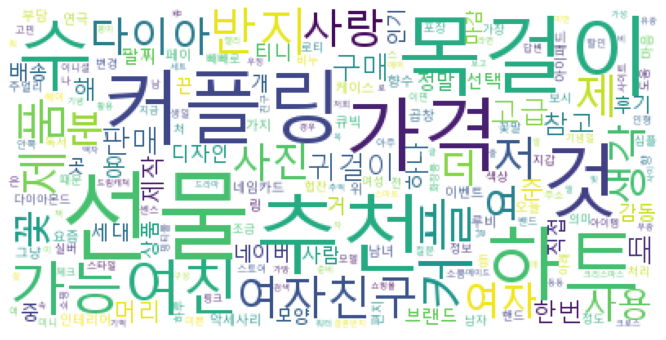

In [50]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

- 배경을 하트로

In [51]:
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('data/heart.jpg'))
image_colors = ImageColorGenerator(mask)

In [57]:
wc = WordCloud(
    font_path ='c:/Windows/fonts/malgun.ttf',
    relative_scaling=0.3, mask=mask,
    background_color='white', 
    min_font_size=1, max_font_size=100).generate_from_frequencies(dict(data))

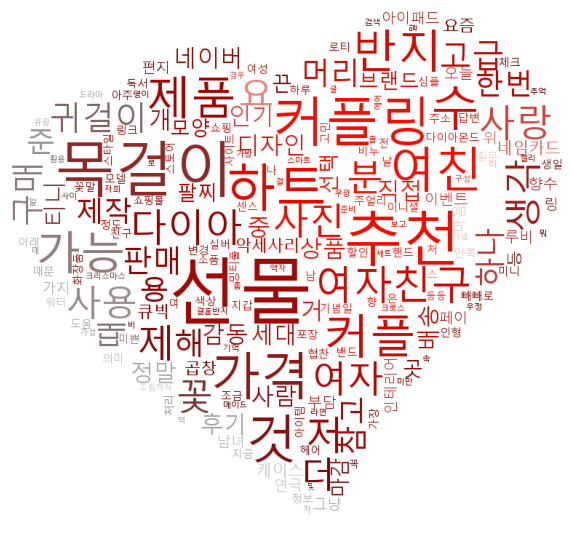

In [59]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')
plt.show()